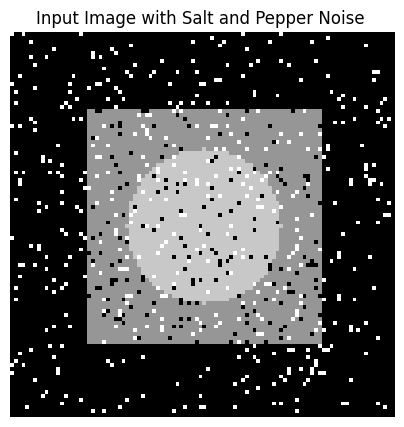

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

# Function to generate salt and pepper noise
# This simulates the "limited sensing capability" or "calibration errors" [cite: 16]
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    row, col = noisy_image.shape

    # Add Salt (White dots) - Higher pixel values [cite: 21]
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[tuple(coords)] = 255

    # Add Pepper (Black dots) - Lower pixel values [cite: 21]
    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[tuple(coords)] = 0

    return noisy_image

# Create a simple synthetic grayscale image (100x100 for speed)
clean_image = np.zeros((100, 100), dtype=np.uint8)
cv2.rectangle(clean_image, (20, 20), (80, 80), 150, -1) # Create a gray square
cv2.circle(clean_image, (50, 50), 20, 200, -1)          # Create a lighter circle

# Apply noise
noisy_image = add_salt_and_pepper_noise(clean_image, 0.05, 0.05)

# Visualize the noisy input
plt.figure(figsize=(5,5))
plt.title("Input Image with Salt and Pepper Noise ")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
def median_filter_manual(input_image, window_width, window_height):
    # 1. Read input dimensions
    image_width, image_height = input_image.shape
    output_image = np.zeros((image_width, image_height), dtype=np.uint8)

    # 2 & 3. Calculate borders (integer division)
    borderx = window_width // 2
    bordery = window_height // 2

    print(f"Processing image with kernel size {window_width}x{window_height}...")

    # Iterate loops based on pseudocode range
    # Note: Python ranges are exclusive at the end, so we use (width - borderx)
    for x in range(borderx, image_width - borderx):
        for y in range(bordery, image_height - bordery):

            window_values = []

            # Iterate through the window kernel [cite: 19, 20]
            for fx in range(window_width):
                for fy in range(window_height):
                    # Fetch value using the offset logic from pseudocode
                    # window[i] = input_image[x + fx - borderx][y + fy - bordery]
                    val = input_image[x + fx - borderx][y + fy - bordery]
                    window_values.append(val)

            # Sort the items in the window [cite: 21]
            window_values.sort()

            # Find the median index
            # Calculation: window_width * window_height / 2 (integer math)
            median_index = (window_width * window_height) // 2

            # Replace the original value with the median [cite: 22]
            output_image[x][y] = window_values[median_index]

    return output_image

Processing image with kernel size 3x3...


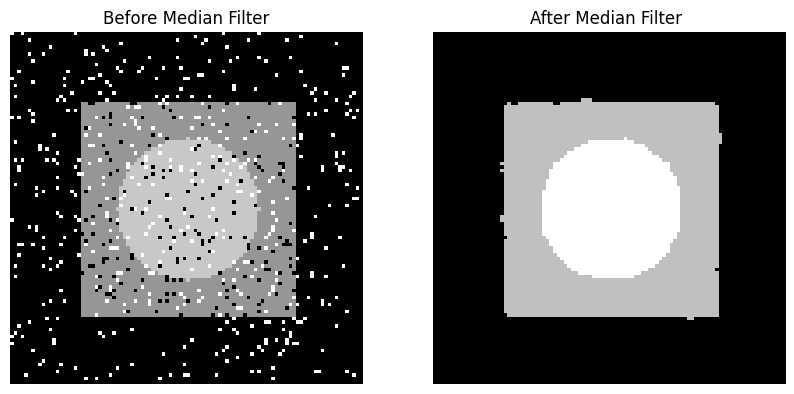

In [4]:
# Run the algorithm
# We use a 3x3 kernel as shown in the example table [cite: 23]
restored_image = median_filter_manual(noisy_image, window_width=3, window_height=3)

# Display Results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Noisy Image
axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title("Before Median Filter")
axes[0].axis('off')

# Plot Restored Image
axes[1].imshow(restored_image, cmap='gray')
axes[1].set_title("After Median Filter ")
axes[1].axis('off')

plt.show()


## Prompt Summary
The Python code implements a **Median Filter** algorithm from scratch to address "salt and pepper" noise in images. This creates a functional demonstration of the computer vision concepts outlined in the assignment, specifically moving from a noisy input to a restored output using non-linear filtering.

## Code Explanation

### 1. Data Preparation (Noise Generation)
The first section creates a synthetic environment to test the filter.
* **Simulating Errors:** Because real-world sensors have limited capabilities or calibration errors, images often contain random black and white pixels.
* **Salt and Pepper:** The code artificially injects this noise by randomly turning pixels white ("salt", high value) or black ("pepper", low value) to mimic the problem description.

### 2. The Median Filter Logic
The second section is the core algorithm, translated directly from the provided pseudocode.
* **Windowing:** The code uses a sliding window (kernel) concept, similar to convolution operations. For a defined $N \times N$ area (e.g., $3 \times 3$), it gathers a list of neighboring pixel values.
* **Sorting:** For every pixel position, the code collects the surrounding values into a list and sorts them numerically.
* **Noise Removal:** By selecting the **median** (middle) value from this sorted list, the algorithm effectively discards the extreme outliers (the pure black or white noise pixels) and replaces the center pixel with a representative value from the neighborhood.

### 3. Execution and Visualization
The final section runs the custom function and displays the results.
* **Comparison:** It plots the "Before" and "After" images side-by-side. I have observed that the median filter has removed the random dots while preserving the edges of the shapes better than a simple average would, successfully reducing the noise impact.